In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


dtype = {'file' : 'str', 'time' : np.float64, '#nodes' : np.float64, 'pathlength' : np.float64, 'horizon' : np.float64, '#moves' : np.float64, 'init_conflicts' : np.float64}

df = pd.read_csv("./benchmarkResults/cbs1.csv", dtype = dtype)
dfg = pd.read_csv("./benchmarkResults/greedy1.csv", dtype = dtype)

df

,file,time,#nodes,pathlength,horizon,#moves,init_conflicts
0,benchmark_examples/size5x5/density20/ex1.lp,0.026977,3.0,1.0,5.0,13.0,2.0
1,benchmark_examples/size5x5/density20/ex10.lp,0.119240,7.0,2.0,5.0,21.0,6.0
2,benchmark_examples/size5x5/density20/ex2.lp,0.262581,13.0,4.0,6.0,23.0,8.0
3,benchmark_examples/size5x5/density20/ex3.lp,0.007507,2.0,0.0,4.0,11.0,0.0
4,benchmark_examples/size5x5/density20/ex4.lp,0.030966,3.0,1.0,4.0,14.0,2.0
...,...,...,...,...,...,...,...
195,benchmark_examples/size8x8/density40/ex5.lp,NaN,NaN,NaN,NaN,NaN,NaN
196,benchmark_examples/size8x8/density40/ex6.lp,NaN,NaN,NaN,NaN,NaN,NaN
197,benchmark_examples/size8x8/density40/ex7.lp,NaN,NaN,NaN,NaN,NaN,NaN
198,benchmark_examples/size8x8/density40/ex8.lp,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
def size(row):
    return int(str(row["file"]).split("/")[1][-1])

def density(row):
    return int(str(row["file"]).split("/")[2][-2:])

def ex(row):
    return int(str(row["file"]).split("/")[3].split(".")[0].split("x")[1])

df['size'] = df.apply(lambda row: size(row), axis=1)
df['density'] = df.apply(lambda row: density(row), axis=1)
df['ex'] = df.apply(lambda row: ex(row), axis=1)

dfg['size'] = df.apply(lambda row: size(row), axis=1)
dfg['density'] = df.apply(lambda row: density(row), axis=1)
dfg['ex'] = df.apply(lambda row: ex(row), axis=1)

In [328]:
# sort data by size + density

def sort_by_category(to_sort):
    '''returns list of DataFrames'''
    lcg = [] #(List of Categorised Groups)
    for i in range(int((len(to_sort))/10)):
        lcg.append(to_sort.iloc[(i*10):(i*10+10)])
    return lcg

# list of DataFrames, split by size + density
catList = sort_by_category(df)
greedyCatList = sort_by_category(dfg)

# for every df in received list, 
# calculate how many NaN rows are in there
# returns: list of int

def nan_counter(cat_df):
    lc = [] # List of Counts
    for elem in cat_df:
        counter = 0
        for i in range(10):
            if np.isnan(elem["time"].iloc[i]):
                counter += 1
        lc.append(counter)
    return lc

# list of NaN rows in cat_list df
nanList = nan_counter(catList)
greedyNanList = nan_counter(greedyCatList)

print(nanList)
print()

# calculate list of mean times 
def mean_list(df_list, nan_List):
    l = []
    counter = 0
    length = len(df_list[0])
    for elem in df_list:
        tempMean = elem.mean()[0]
        locNans = nan_List[counter]
        if(locNans != 0):
            if(locNans == length):
                tempMean = 300
            else: 
                tempMean = (tempMean * (length - locNans) + locNans * 300) / length
        l.append(tempMean)
        counter += 1
    return l

# list of mean times for each size + density combination
mean = mean_list(catList, nanList)
greedyMean = mean_list(greedyCatList, greedyNanList)
print(mean)

[0, 0, 0, 0, 1, 0, 0, 2, 4, 8, 0, 1, 3, 9, 9, 1, 5, 9, 10, 10]

[0.07997403679764829, 0.20635755550465545, 0.24728495688759722, 4.594714571005897, 36.97470663119748, 9.446473872309435, 3.6777116313081932, 86.10836699590145, 142.1369115272042, 264.39002846740186, 2.1611194005963625, 34.89692563439894, 148.54677808179696, 270.23168909740053, 273.07270249160064, 87.45164979289693, 196.640190087902, 279.82336908630094, 300, 300]


In [344]:
def plotDensity(m,nl):
    points = [20,25,30,35,40]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[:5])
    ax2.scatter(points, m[5:10])
    ax3.scatter(points, m[10:15])
    ax4.scatter(points, m[15:])
    
    ax1.set_xlabel('density in %')
    ax1.set_ylabel('time in s')
    ax1.set_title('size: 5x5')
    ax2.set_xlabel('density in %')
    ax2.set_ylabel('time in s')
    ax2.set_title('size: 6x6')
    ax3.set_xlabel('density in %')
    ax3.set_ylabel('time in s')
    ax3.set_title('size: 7x7')
    ax4.set_xlabel('density in %')
    ax4.set_ylabel('time in s')
    ax4.set_title('size: 8x8')
    
    i = 0
    while i<20:
        if nl[i] > 3:
            if i < 5:
                ax1.vlines(points[i%5]-1, 0, maxM, color="red")
                i=5
                continue
            elif i < 10:
                ax2.vlines(points[i%5]-1, 0, maxM, color="red")
                i=10
                continue
            elif i < 15:
                ax3.vlines(points[i%5]-1, 0, maxM, color="red")
                i=15
                continue
            else:
                ax4.vlines(points[i%5]-1, 0, maxM, color="red")
                break
        i+=1

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()


    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()

    plt.show()
    
def plotSize(m, nl):
    points = [5,6,7,8]
    
    maxM = max(m)

    fig = plt.figure()
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2, sharey=ax1, sharex=ax1)
    ax3 = fig.add_subplot(2, 3, 3, sharey=ax1, sharex=ax1)
    ax4 = fig.add_subplot(2, 3, 4, sharey=ax1, sharex=ax1)
    ax5 = fig.add_subplot(2, 3, 5, sharey=ax1, sharex=ax1)

    ax1.scatter(points, m[::5])

    for i in range(20)[::5]:
        if nl[i] > 3:
            ax1.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax2.scatter(points, m[1::5])

    for i in range(20)[1::5]:
        if nl[i] > 3:
            ax2.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax3.scatter(points, m[2::5])

    for i in range(20)[2::5]:
        if nl[i] > 3:
            ax3.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax4.scatter(points, m[3::5])

    for i in range(20)[3::5]:
        if nl[i] > 3:
            ax4.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break

    ax5.scatter(points, m[4::5])

    for i in range(20)[4::5]:
        if nl[i] > 3:
            ax5.vlines(points[i//5]-0.2, 0, maxM, color="red")
            break
            
    ax1.set_xlabel('instance size')
    ax1.set_ylabel('time in s')
    ax1.set_title('density: 20%')
    ax2.set_xlabel('instance size')
    ax2.set_ylabel('time in s')
    ax2.set_title('density: 25%')
    ax3.set_xlabel('instance size')
    ax3.set_ylabel('time in s')
    ax3.set_title('density: 30%')
    ax4.set_xlabel('instance size')
    ax4.set_ylabel('time in s')
    ax4.set_title('density: 35%')
    ax5.set_xlabel('instance size')
    ax5.set_ylabel('time in s')
    ax5.set_title('density: 40%')

    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()

    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()
    ax5.grid()

    plt.show()

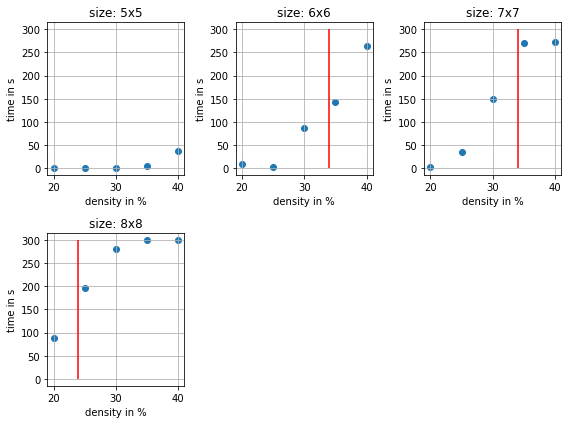

In [345]:
plotDensity(mean, nanList)

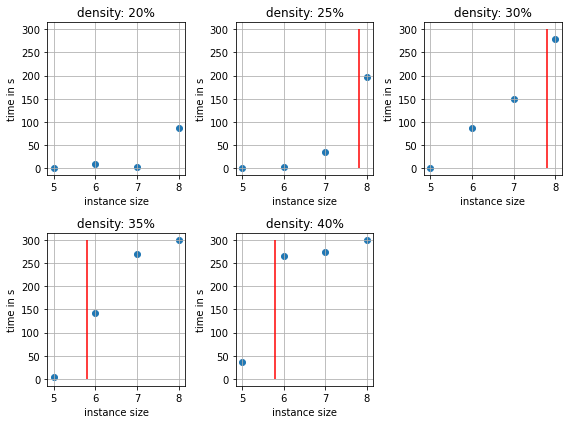

In [346]:
plotSize(mean, nanList)

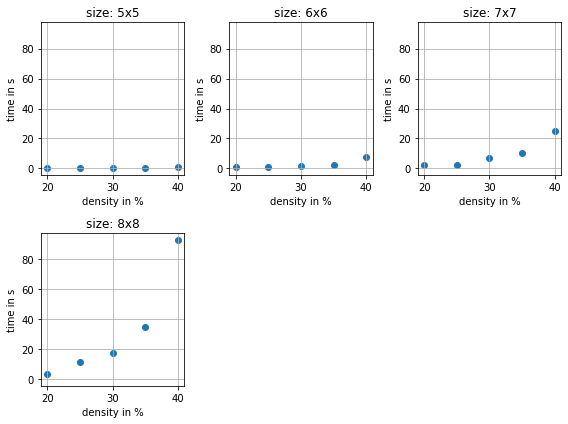

In [332]:
plotDensity(greedyMean, greedyNanList)

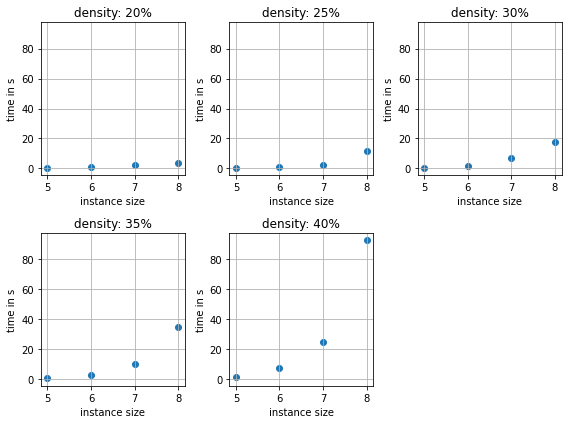

In [333]:
plotSize(greedyMean, greedyNanList)

In [334]:
def compareBar(cl1, cl2, category):
    points = [*range(1,11)]
    for i in range(len(cl1)):
        
        new_df = pd.DataFrame()
        new_df['ex'] = cl1[i]['ex']
        new_df[category] = cl1[i][category]
        new_df.insert(loc=1, column='greedy', value=False, allow_duplicates=True)

        new_gdf = pd.DataFrame()
        new_gdf['ex'] = cl2[i]['ex']
        new_gdf[category] = cl2[i][category]
        new_gdf.insert(loc=1, column='greedy', value=True, allow_duplicates=True)

        plotdf = new_df.append(new_gdf)

        plot = sns.catplot(x='ex', y=category, hue='greedy', data=plotdf, dodge=True, kind='bar')
        
        plot.set(title=f"size: {i // 5 + 5}, density: {(i % 5)*5 + 20}%")

        plt.xlabel('example number')
        plt.savefig(f'figures/comparisonGreedyVsNonGreedy_Size{i // 5 + 5}_Density{(i % 5)*5 + 20}_{category}.png', bbox_inches='tight')
        plt.show()

        
def compareScatterTimeExp(cl1, cl2, category):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        
        # [x, y]
        data = np.array([list(catList[i][category]), list(cl1[i]['time'])])
        # data sorted by pathlength (x values)
        data = data[:, np.argsort( data[0] ) ]
        
        # remove NaN values
        new_data = []
        for arr in data:
            newrow = arr[~np.isnan(arr)]
            new_data.append(list(newrow))
        
        ylog_data = np.log(new_data[1]) 
        curve_fit = np.polyfit(new_data[0], ylog_data, 1)
        y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*np.array(new_data[0]))
        
        ax1.scatter(new_data[0], new_data[1])
        ax1.plot(new_data[0], y, c='orange')
        
        ax2.scatter(list(greedyCatList[i][category]), list(cl2[i]['time']))
        
        ax1.set_xlabel(category)
        ax1.set_ylabel('time')
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category)
        ax2.set_ylabel('time')
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        
        plt.savefig("fig.png")
        plt.show()
        
def compareScatter(cl1, cl2, category1, category2):
    for i in range(len(catList)):

        fig = plt.figure()

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)

        ax1.scatter(list(catList[i][category1]), list(cl1[i][category2]))
        ax2.scatter(list(greedyCatList[i][category1]), list(cl2[i][category2]))
        
        
        ax1.set_xlabel(category1)
        ax1.set_ylabel(category2)
        ax1.set_title('cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')
        ax2.set_xlabel(category1)
        ax2.set_ylabel(category2)
        ax2.set_title('greedy cbs \n size: ' + str(i//5 + 5) + ', density: ' + str((i%5 + 4)*5) + '%')

        fig.set_size_inches(8, 6, forward=True)
        fig.tight_layout()  

        ax1.grid()
        ax2.grid()
        

        plt.show()

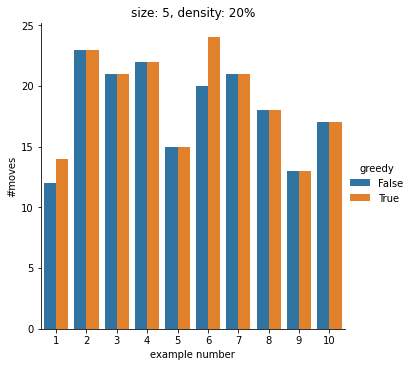

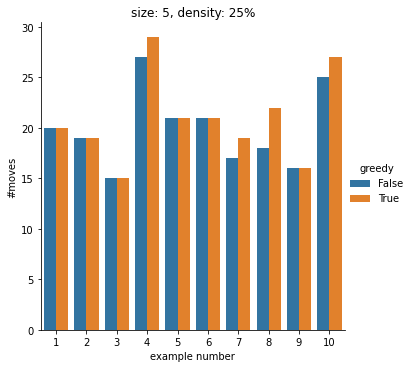

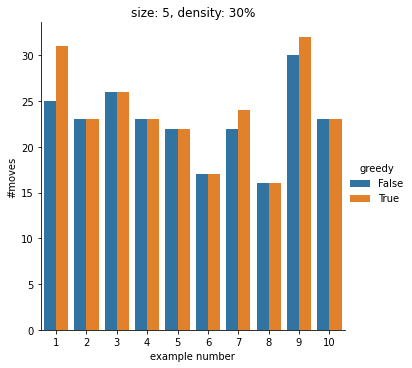

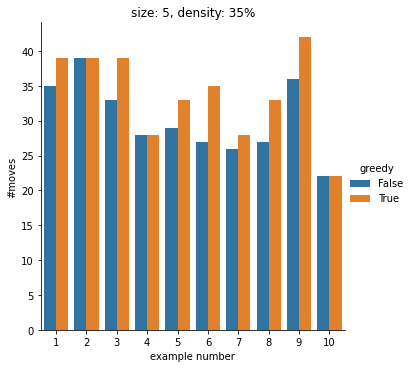

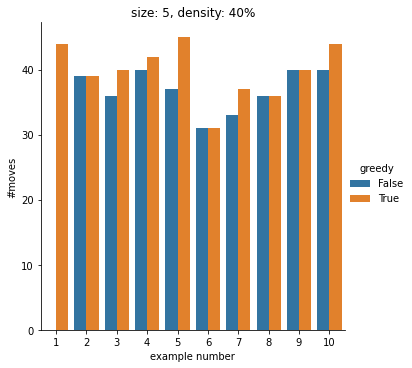

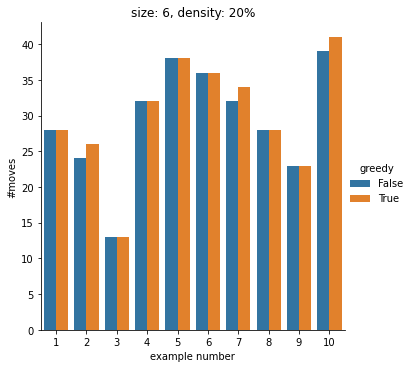

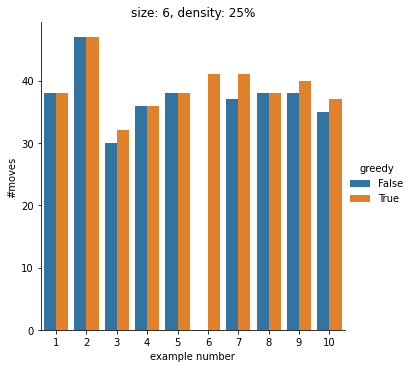

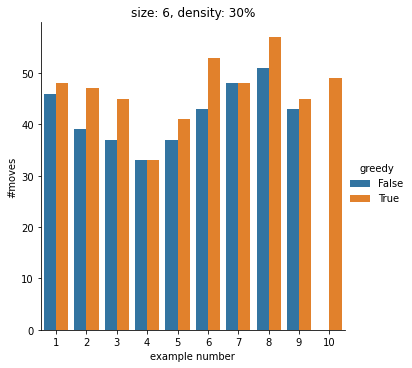

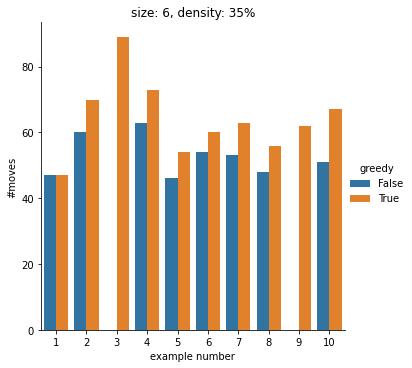

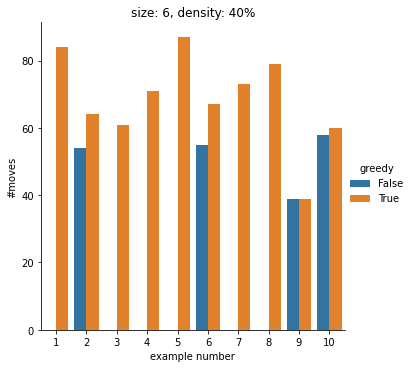

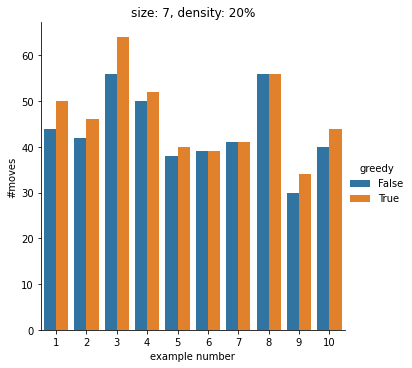

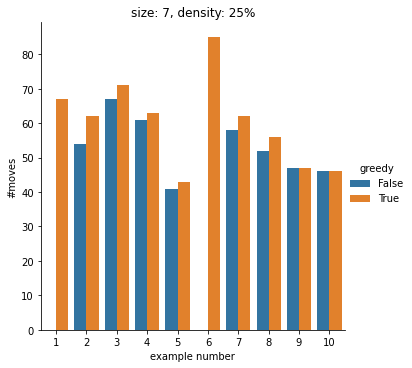

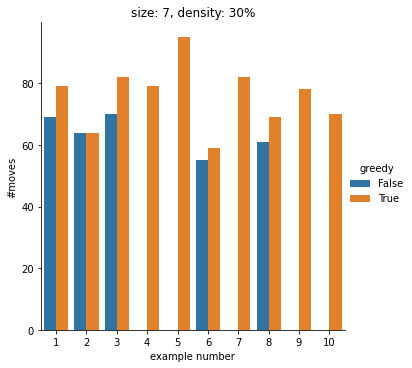

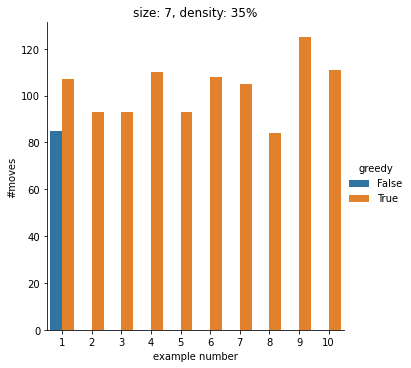

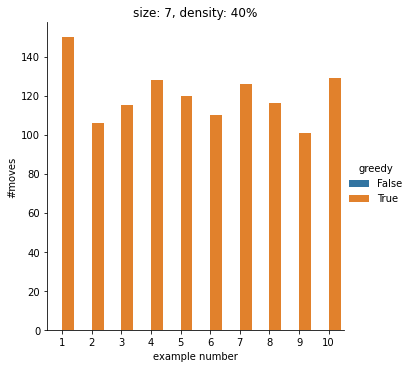

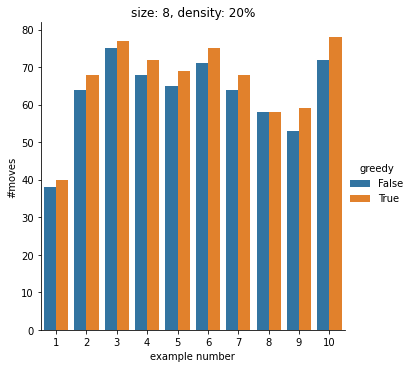

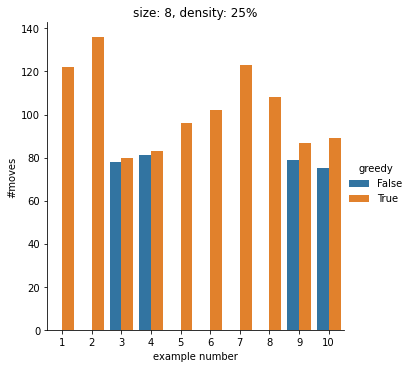

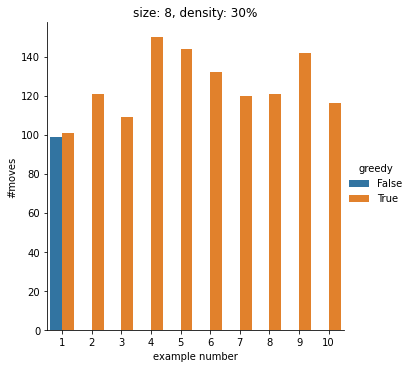

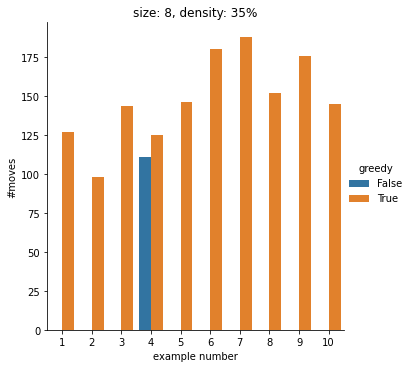

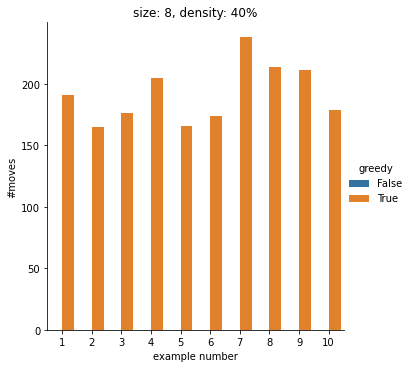

In [324]:
compareBar(catList, greedyCatList, '#moves')

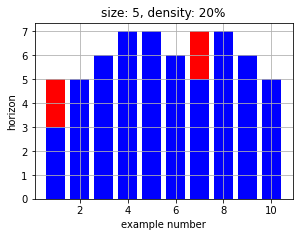

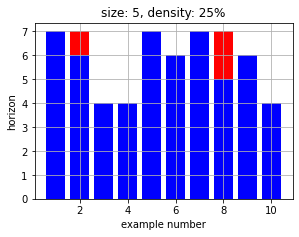

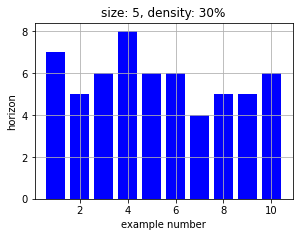

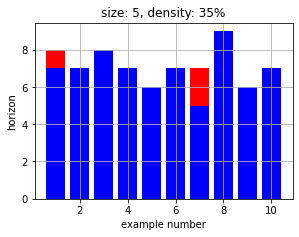

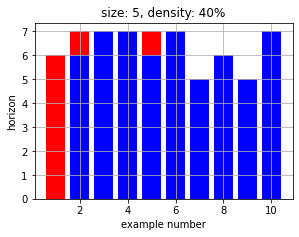

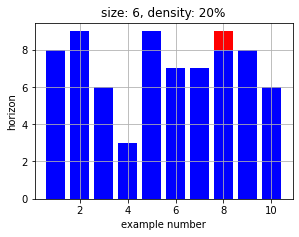

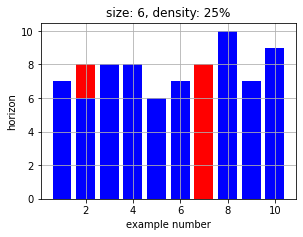

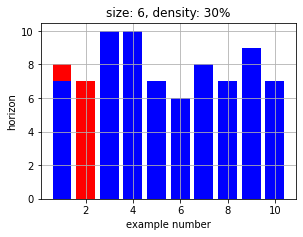

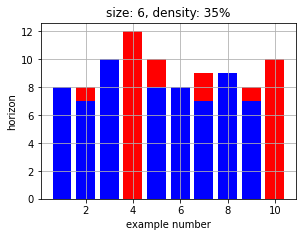

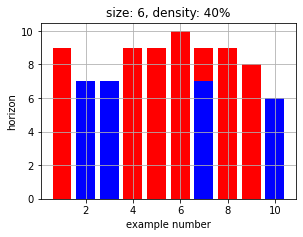

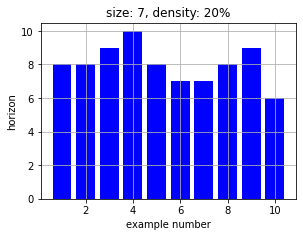

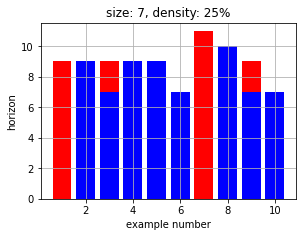

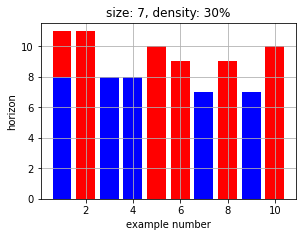

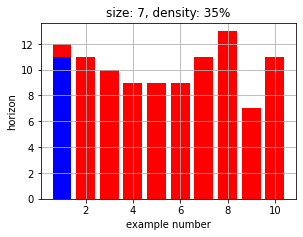

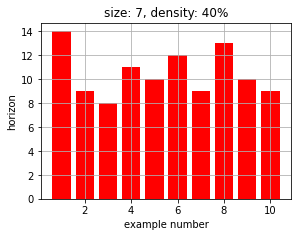

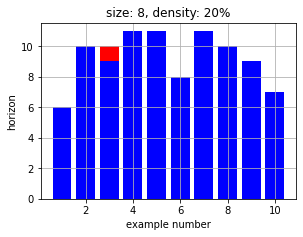

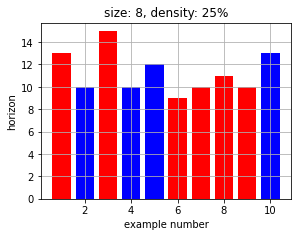

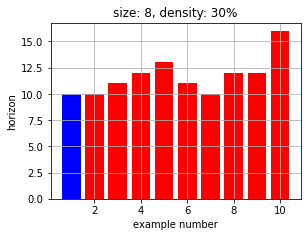

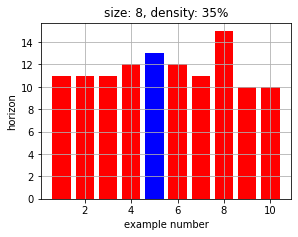

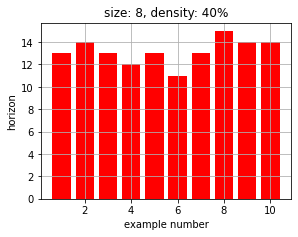

In [210]:
compareBar(catList, greedyCatList, 'horizon')

[-2.67168457 -2.52423045 -2.40814413 -0.99450109  0.2857926   0.19200431
 -0.64164442  0.99669073  0.99364397  1.58250309]


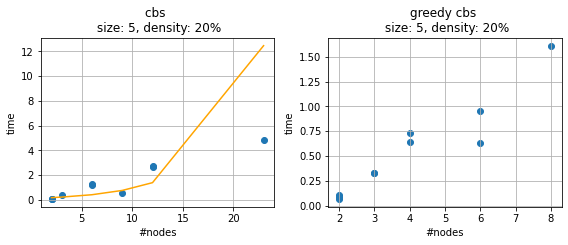

[-0.99105183 -1.08018024 -1.16692608 -1.17360564 -1.35277832 -0.24529119
  0.42008533  0.20856626  0.35975088  0.78730771]


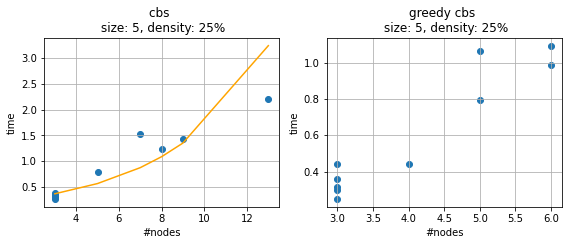

[-1.29168417 -0.44788307 -0.42107736  0.01903936  0.65215595  0.40216725
  0.55252198  0.88530939  0.87926385  2.20076302]


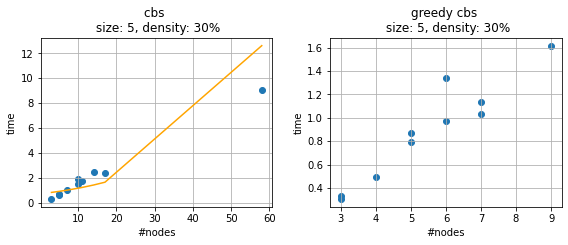

[0.74792429 1.37162864 1.7239405  2.39369554 2.64675783 2.96521708
 3.38839234 4.28049852 4.70990644 5.19781818]


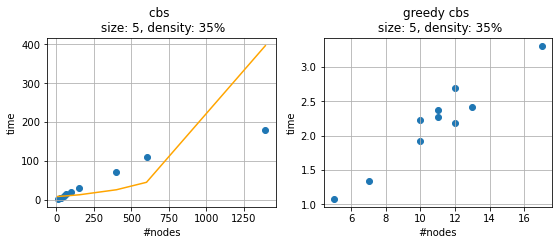

[0.65015856 1.38718885 2.09938558 2.26375081 2.93857372 3.59366976
 4.00442516 4.96058547 5.25262129]


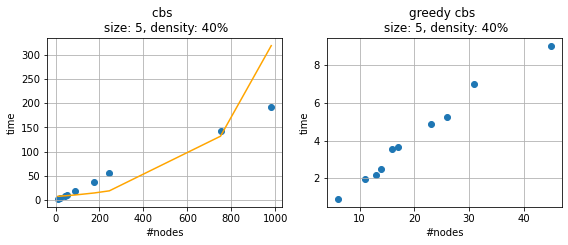

[-2.34372751 -0.51642808  0.07794667 -0.55062882  0.65641823  1.48676712
  2.02244009  2.59559677  2.78617077  3.0809024 ]


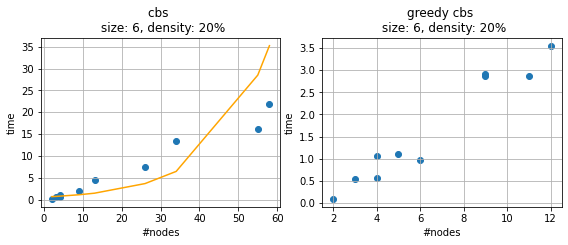

[0.25917443 0.17382101 1.57630373 2.02944866 2.0660136  2.16830006
 2.75976294 2.75470025 2.83514557]


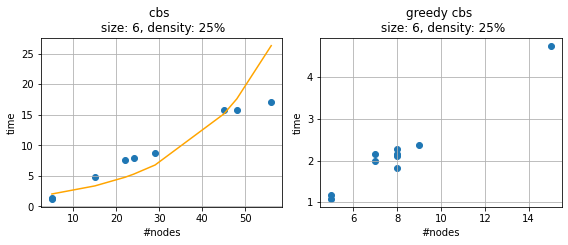

[-8.64429180e-01 -3.25224876e-01 -3.24711693e-02 -9.55694530e-04
  6.14175216e-01  1.01904952e+00  3.08174242e+00  3.98717649e+00
  4.82693841e+00]


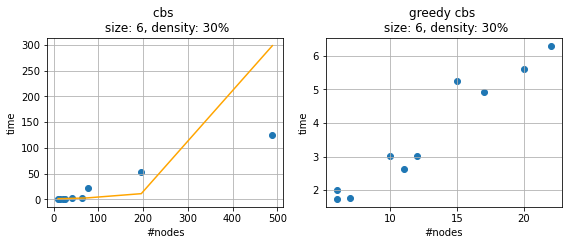

[0.9320995  1.0449529  1.51986731 1.60074503 1.85214797 2.47880764
 3.79746509 4.49643286]


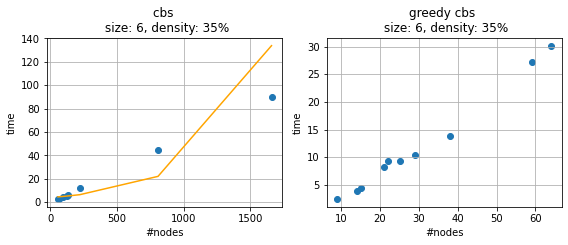

[0.09328405 1.73345426 1.63051297 3.4316873 ]


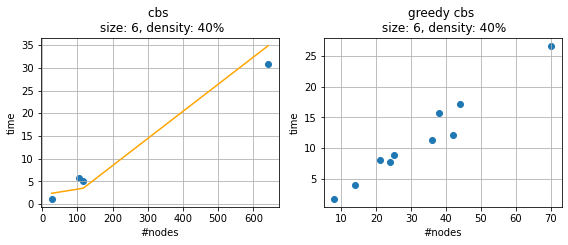

[-2.62253609 -1.64599748 -0.83016561  0.19606903 -0.41572984  1.28740795
  2.03620803  2.57545562  4.53013337  4.38236148]


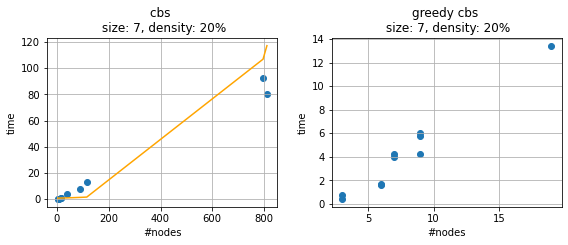

[-0.78546415 -0.48287065  0.29761295 -0.24394958  0.4657591   0.45660914
  2.6151015   4.51565172]


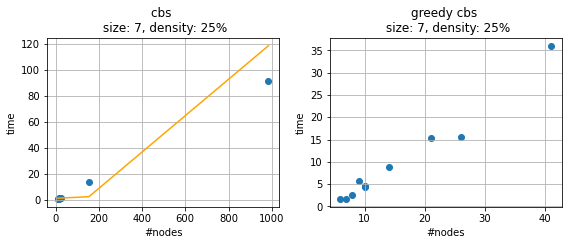

[1.43640506 2.17023931 2.72227546 3.38166717 3.55572398]


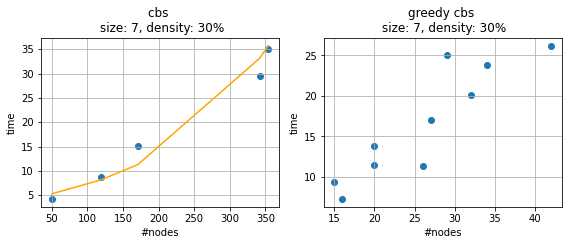

[5.25471292]


C:\Users\menaP\AppData\Local\Temp/ipykernel_9772/1675893794.py:1: RankWarning: Polyfit may be poorly conditioned
  compareScatterTime(catList, greedyCatList, '#nodes')


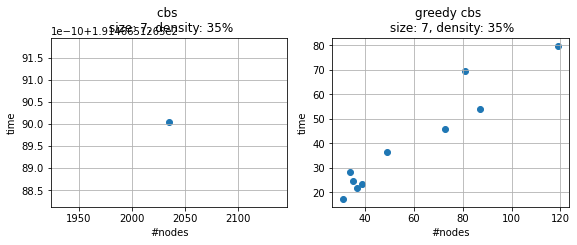

[]


TypeError: expected non-empty vector for x

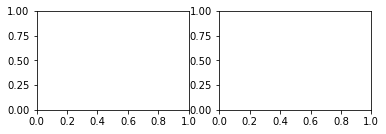

In [211]:
compareScatterTime(catList, greedyCatList, '#nodes')

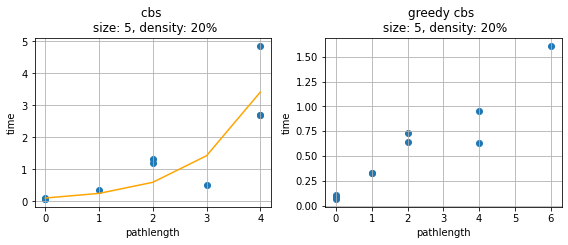

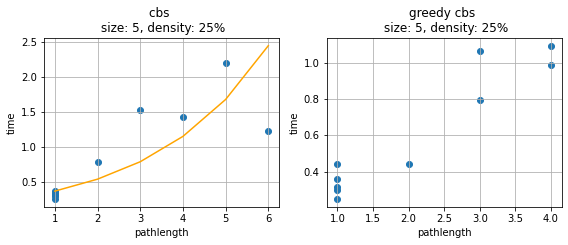

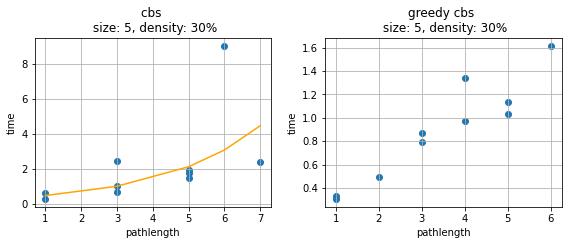

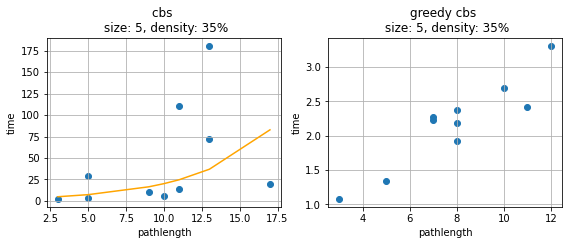

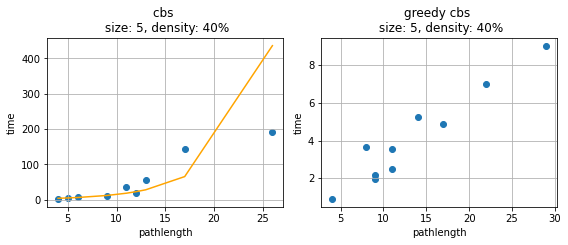

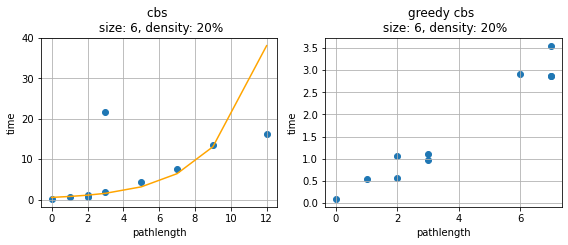

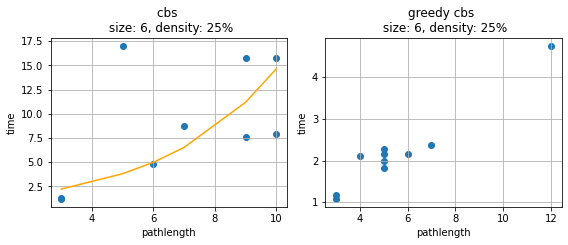

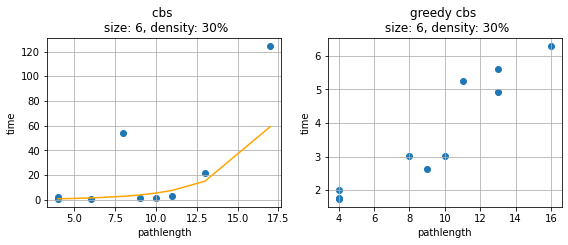

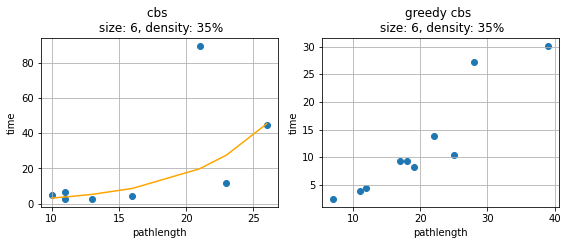

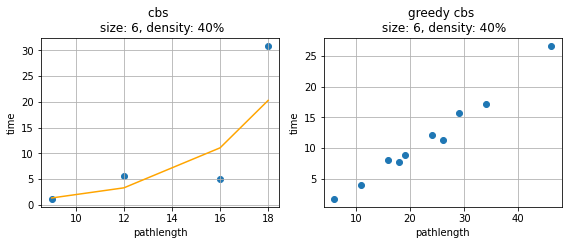

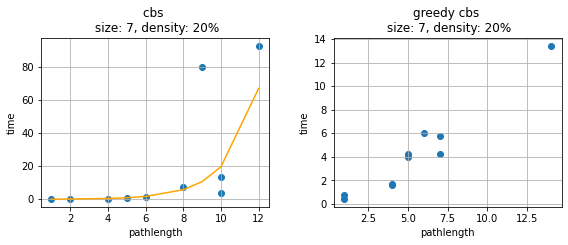

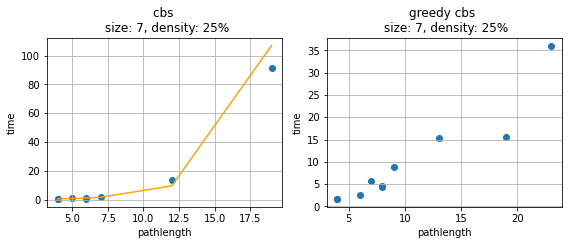

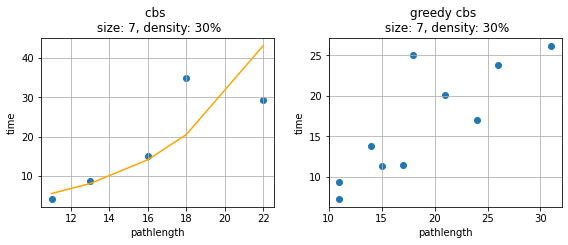

C:\Users\menaP\AppData\Local\Temp/ipykernel_9772/2818549291.py:1: RankWarning: Polyfit may be poorly conditioned
  compareScatterTimeExp(catList, greedyCatList, 'pathlength')


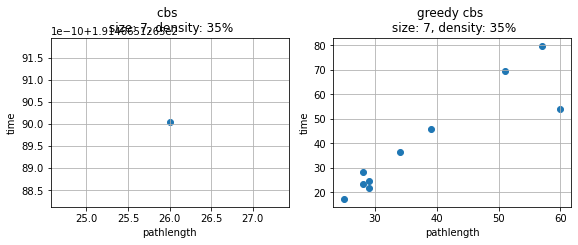

TypeError: expected non-empty vector for x

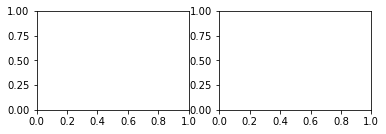

In [212]:
compareScatterTimeExp(catList, greedyCatList, 'pathlength')
#Besonders in interessant! ng logorithmisch, g linear?

#plt.savefig('fig.png')

[-0.64164442 -2.67168457  0.99669073 -2.40814413  1.58250309 -0.99450109
 -2.52423045  0.2857926   0.19200431  0.99364397]


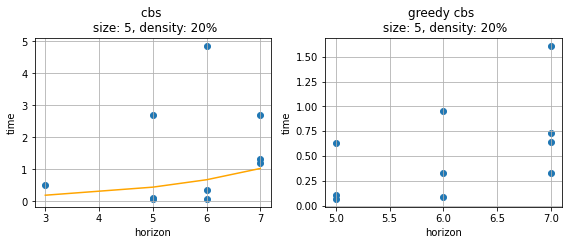

[-0.24529119 -1.08018024 -1.35277832  0.20856626  0.78730771 -1.16692608
  0.35975088 -0.99105183  0.42008533 -1.17360564]


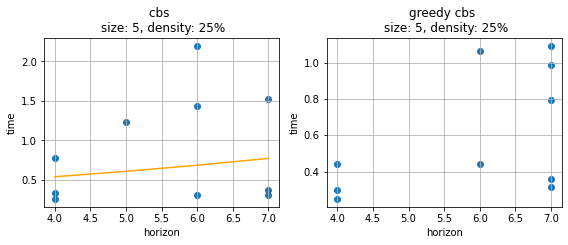

[-1.29168417 -0.44788307  0.87926385  0.40216725  0.55252198 -0.42107736
  0.01903936  2.20076302  0.65215595  0.88530939]


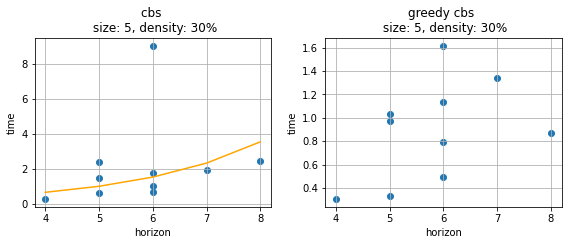

[4.28049852 1.37162864 1.7239405  5.19781818 0.74792429 2.39369554
 2.96521708 2.64675783 3.38839234 4.70990644]


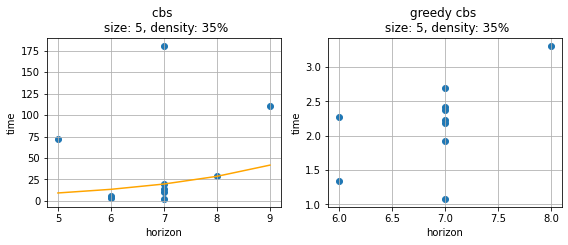

[2.09938558 0.65015856 2.93857372 4.00442516 2.26375081 3.59366976
 5.25262129 4.96058547 1.38718885]


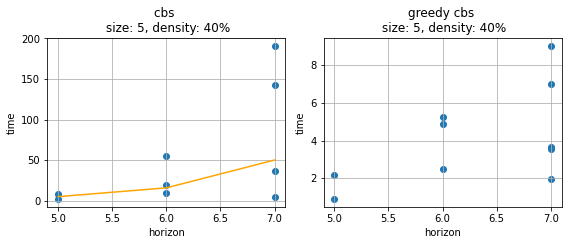

[-2.34372751  0.65641823 -0.51642808  1.48676712  0.07794667  3.0809024
  2.02244009 -0.55062882  2.59559677  2.78617077]


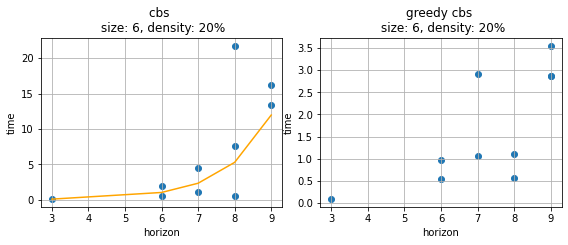

[2.02944866 2.83514557 2.16830006 0.17382101 1.57630373 2.75470025
 0.25917443 2.0660136  2.75976294]


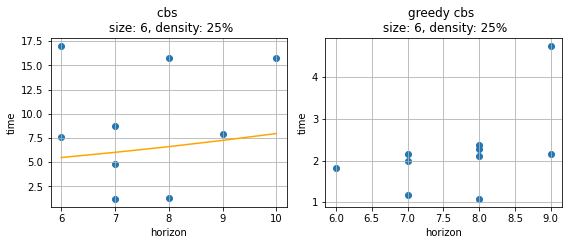

[-9.55694530e-04  3.98717649e+00 -8.64429180e-01 -3.25224876e-01
 -3.24711693e-02  1.01904952e+00  6.14175216e-01  3.08174242e+00
  4.82693841e+00]


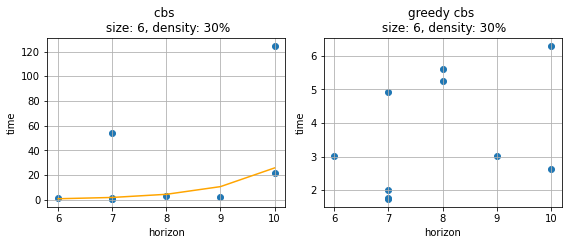

[1.51986731 4.49643286 1.85214797 0.9320995  2.47880764 1.60074503
 1.0449529  3.79746509]


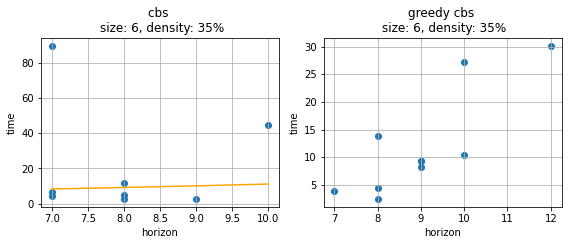

[0.09328405 3.4316873  1.73345426 1.63051297]


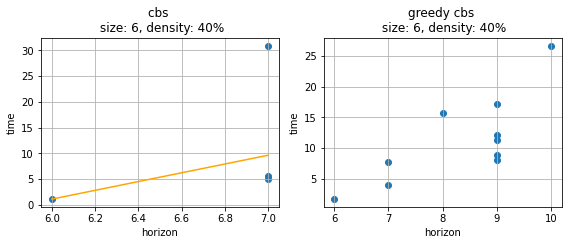

[-0.83016561 -1.64599748 -2.62253609  4.38236148  0.19606903  1.28740795
  2.03620803 -0.41572984  2.57545562  4.53013337]


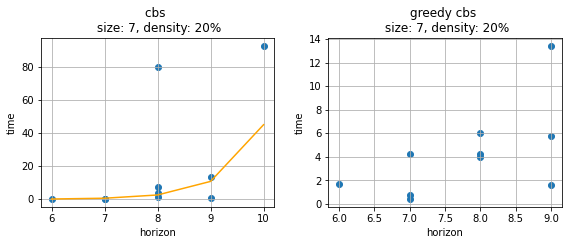

[ 0.29761295 -0.24394958  2.6151015  -0.48287065 -0.78546415  4.51565172
  0.4657591   0.45660914]


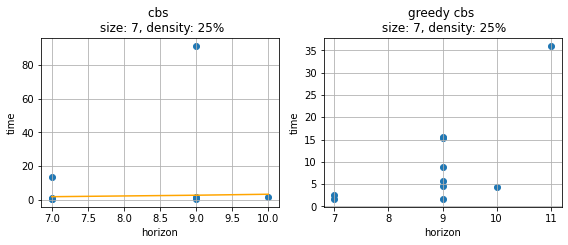

[1.43640506 2.17023931 2.72227546 3.55572398 3.38166717]


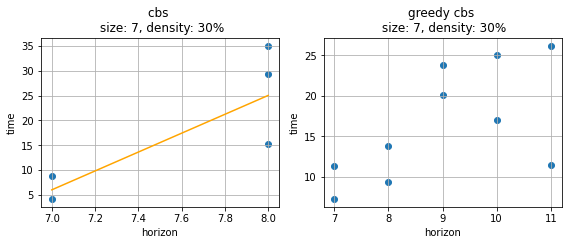

[5.25471292]


C:\Users\menaP\AppData\Local\Temp/ipykernel_9772/4082142125.py:1: RankWarning: Polyfit may be poorly conditioned
  compareScatterTime(catList, greedyCatList, 'horizon')


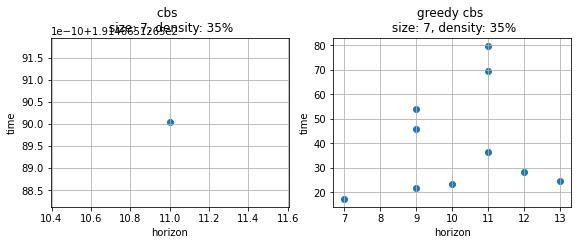

[]


TypeError: expected non-empty vector for x

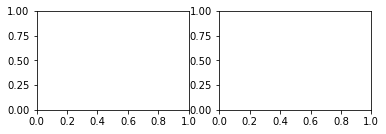

In [213]:
compareScatterTime(catList, greedyCatList, 'horizon')

In [ ]:
compareScatterTime(catList, greedyCatList, '#moves')

In [ ]:
compareScatterTime(catList, greedyCatList, 'init_conflicts')

In [ ]:
compareScatter(catList, greedyCatList, 'init_conflicts', '#nodes')

In [ ]:
compareScatter(catList, greedyCatList, '#moves', '#nodes')

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

plt.xscale('log')

ax1.eventplot(list(catList[5]['time']))

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()

plt.show()

In [ ]:
# curve fitting
from scipy.interpolate import interp1d

x_data = np.linspace(0,5, num=5)
y_data = np.array(mean[:5])
print(y_data)


ylog_data = np.log(y_data)  
curve_fit = np.polyfit(x_data, ylog_data, 1)
y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x_data)

plt.scatter(x_data, y_data)

plt.plot(x_data, y, c='orange')
plt.show()

In [ ]:
inc_cbs1 = pd.read_csv("inc_benchmarkResults/cbs1.csv")
inc_cbs2 = pd.read_csv("inc_benchmarkResults/cbs2.csv")
inc_cbs3 = pd.read_csv("inc_benchmarkResults/cbs3.csv")

#Nullen bei pathlength sehr komisch, das sollte sich mal jemand anschauen

# use this for only the times
dfic_temp = pd.concat([inc_cbs1.iloc[:,:2], inc_cbs2.iloc[:,:2], inc_cbs3.iloc[:,:2]])
by_row_index = dfic_temp.groupby(dfic_temp.index)

# calculate means for times of all dataframes
dfic_means = by_row_index.mean(numeric_only=True)
dfic_means

dfic = pd.concat([inc_cbs1['file'], dfic_means], axis=1)

In [ ]:
def num(row):
    return int(str(row["file"]).split("/")[-1].split("r")[0])

dfic['num'] = dfic.apply(lambda row: num(row), axis=1)
inc_cbs1['num'] = inc_cbs1.apply(lambda row: num(row), axis=1)
inc_cbs2['num'] = inc_cbs2.apply(lambda row: num(row), axis=1)
inc_cbs3['num'] = inc_cbs3.apply(lambda row: num(row), axis=1)

In [ ]:
def plotIncLog(dataframe, category, firstConflictOccurence, size):
    dataframe.plot(x="num", y=category, label="solving speed when num of robots gradually increased", kind="scatter", ylim=(0, size*100), xlim=(1,18), logy=True)
    plt.vlines(firstConflictOccurence + 0.5, 10^(-2), size*100, label="first conflict occurs", color="red")
    plt.legend()
    plt.show()
    
def plotInc(dataframe, category, firstConflictOccurence, size):
    dataframe.plot(x="num", y=category, label="initial conflicts when num of robots gradually increased", kind="scatter", ylim=(-2, size), xlim=(1,18))
    plt.legend()
    plt.show()

In [ ]:
plotIncLog(inc_cbs1, 'time', 7, 100)
plotIncLog(inc_cbs2, 'time', 2, 100)
plotIncLog(inc_cbs3, 'time', 3, 100)

In [ ]:
plotInc(inc_cbs1, 'init_conflicts', 7, 50)
plotInc(inc_cbs2, 'init_conflicts', 2, 50)
plotInc(inc_cbs3, 'init_conflicts', 3, 50)

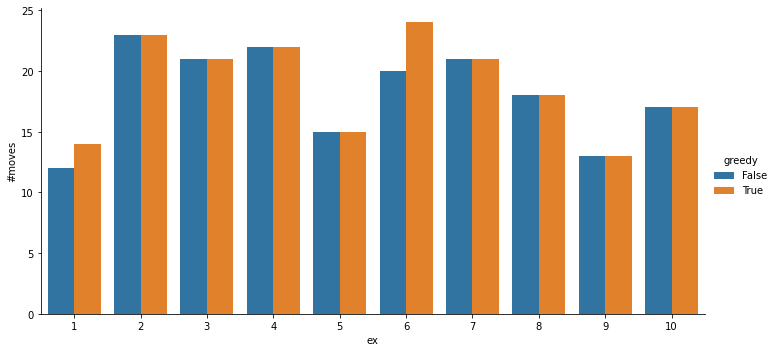

In [256]:
new_df = pd.DataFrame()
new_df['ex'] = catList[0]['ex']
new_df['#moves'] = catList[0]['#moves']
new_df.insert(loc=1, column='greedy', value=False, allow_duplicates=True)

new_gdf = pd.DataFrame()
new_gdf['ex'] = greedyCatList[0]['ex']
new_gdf['#moves'] = greedyCatList[0]['#moves']
new_gdf.insert(loc=1, column='greedy', value=True, allow_duplicates=True)

plotdf = new_df.append(new_gdf)
plotdf


import seaborn as sns

sns.catplot(x='ex', y='#moves', hue='greedy', aspect=2, data=plotdf, dodge=True, kind='bar')
#plt.xticks(rotation=315)
plt.show()